Installation: Install packages like beautifulsoup, exploratory analysis and statistical packages

In [1]:
conda install -c anaconda beautifulsoup4

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |           py36_0         168 KB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from requests import get
print('Done!')

Done!


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
print('Done!')

Done!


In [4]:
pip install geopy

     |████████████████████████████████| 112kB 5.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Done!')

Done!


Website Scraping: Scrape website for population density of each zip code, create new dataframe (df) and populate with data from website

In [6]:
#first website is for the population density of the U.S. zip code in New York City
url = 'http://www.usa.com/rank/new-york-state--population-density--zip-code-rank.htm'
response = get(url)
print('Done!')

Done!


In [7]:
soup = BeautifulSoup(response.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [8]:
#create columns for new dataframe
column_names = ['Rank','Population Density','Zip Code']
df = pd.DataFrame(columns = column_names)

In [9]:
#find the correct table on the website
table = soup.find('table', width="648")

In [10]:
#populate the table created by running a for loop through the website values
for tr_cell in table.find_all('tr'):
    row=[]
    for td_cell in tr_cell.find_all('td'):
        row.append(td_cell.text.strip())
        if len(row) == 3:
            df.loc[len(df)] = row

In [11]:
df.head(10)

Rank    Population Density          Zip Code
0  Rank  Population Density ▼  Zip / Population
1    1.       146,955.3/sq mi    10028 / 46,169
2    2.       132,677.4/sq mi    10128 / 62,447
3    3.       132,095.7/sq mi    10075 / 24,377
4    4.       129,548.9/sq mi    10025 / 97,373
5    5.       123,875.9/sq mi    10023 / 60,762
6    6.       120,133.3/sq mi    10040 / 45,278
7    7.       115,461.7/sq mi    10026 / 38,372
8    8.       110,137.5/sq mi     10162 / 1,252
9    9.       108,864.6/sq mi    10021 / 42,142

Dataframe Cleaning: Renaming of columns, information of the dataframe, changing types of values in dataframe

In [12]:
#rename, drop, and reset index of columns and dataframe
df = df.rename(columns={'Population Density':'Population Density sq/mile'})
df = df.drop([0])
df.drop(['Rank'], axis = 1, inplace = True)
df = df.reset_index()
df = df.drop(['index'], axis =1)

#double check data is correct
df.info()
df.dtypes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Population Density sq/mile  1771 non-null   object
 1   Zip Code                    1771 non-null   object
dtypes: object(2)
memory usage: 27.8+ KB


Population Density sq/mile        Zip Code
0            146,955.3/sq mi  10028 / 46,169
1            132,677.4/sq mi  10128 / 62,447
2            132,095.7/sq mi  10075 / 24,377
3            129,548.9/sq mi  10025 / 97,373
4            123,875.9/sq mi  10023 / 60,762

In [13]:
#take out units from the values in table
df['Population Density sq/mile'] = df['Population Density sq/mile'].str.replace(r'/sq mi', '')
df['Zip Code'] = df['Zip Code'].str[:5]

#rename table with more obvious name
df_pop_density = df

#continue to alter the values in table to ensure they can be converted to integers
df_pop_density['Population Density sq/mile'] = df_pop_density['Population Density sq/mile'].str.replace(',', '')

#convert column values to floats then integers
df_pop_density['Population Density sq/mile'] = df_pop_density['Population Density sq/mile'].astype(float).astype(int)
df_pop_density['Zip Code'] = df_pop_density['Zip Code'].astype(int)

#double check correct types and values
df_pop_density.head(10)

Population Density sq/mile  Zip Code
0                      146955     10028
1                      132677     10128
2                      132095     10075
3                      129548     10025
4                      123875     10023
5                      120133     10040
6                      115461     10026
7                      110137     10162
8                      108864     10021
9                      105863     10030

In [14]:
df_pop_density.dtypes

Population Density sq/mile    int64
Zip Code                      int64
dtype: object

Website Scraping: Scraping of website 2 for number of COVID-19 deaths, second dataframe creation

In [15]:
#scraping second website for COVID-9 deaths
url1 = 'https://github.com/nychealth/coronavirus-data/blob/master/data-by-modzcta.csv'
response1 = get(url1)
print('Done!')

Done!


In [16]:
#create columns for second dataframe
column_names1 = ['No.','Zip Code','Name','Borough','Cases', 'Case Rate','POP','Deaths','Death rate','% Positive','Total Tests']

#create second dataframe and show column headings
df1 = pd.DataFrame(columns = column_names1)
df1

Empty DataFrame
Columns: [No., Zip Code, Name, Borough, Cases, Case Rate, POP, Deaths, Death rate, % Positive, Total Tests]
Index: []

In [17]:
#scrape second website and find relevant table on website
soup1 = BeautifulSoup(response1.text, 'html.parser')
table1 = soup1.find('table', class_='js-csv-data csv-data js-file-line-container')

In [18]:
#populate second dataframe with for loop running through the website table
for tr_cell in table1.find_all('tr'):
    row1=[]
    for td_cell in tr_cell.find_all('td'):
        row1.append(td_cell.text.strip())
        if len(row1) == 11:
            df1.loc[len(df1)] = row1

In [19]:
#check second dataframe values
df1.dtypes

No.            object
Zip Code       object
Name           object
Borough        object
Cases          object
Case Rate      object
POP            object
Deaths         object
Death rate     object
% Positive     object
Total Tests    object
dtype: object

In [20]:
df1.head(10)

No. Zip Code                                               Name    Borough  \
0        10001                         Chelsea/NoMad/West Chelsea  Manhattan   
1        10002                          Chinatown/Lower East Side  Manhattan   
2        10003            East Village/Gramercy/Greenwich Village  Manhattan   
3        10004                                 Financial District  Manhattan   
4        10005                                 Financial District  Manhattan   
5        10006                                 Financial District  Manhattan   
6        10007                                            TriBeCa  Manhattan   
7        10009  Alphabet City/East Village/Stuyvesant Town-Coo...  Manhattan   
8        10010                         Flatiron/Gramercy/Kips Bay  Manhattan   
9        10011                                            Chelsea  Manhattan   

  Cases Case Rate       POP Deaths Death rate % Positive Total Tests  
0   433   1837.62  23563.03     26     110.34       7.25        5970  
1  1306   1701.51  76755.41    161     209.76       8.67       15071  
2   525    975.81  53801.62     34       63.2       4.56       11510  
3    39   1068.32   3650.61      1      27.39       5.47         713  
4    92   1095.75   8396.11      2      23.82       5.02        1834  
5    39   1127.89   3457.77      0          0       5.24         744  
6    72    872.76   8249.73      3      36.36        4.2        1716  
7   825    1404.3  58747.99     69     117.45       6.11       13493  
8   330    1019.4  32371.86     19      58.69        4.1        8057  
9   613   1238.37  49500.52     43      86.87       5.12       11963

Dataframe Cleaning: Cleaning of second dataframe and merging of the two dataframes into one

In [21]:
#drop columns from second dataframe
df1.drop(['No.'], axis=1, inplace = True)
df1.drop(['Cases','Case Rate','POP','Death rate','% Positive','Total Tests'], axis = 1, inplace = True)

#reclassify type of columns
df1['Zip Code'] = df1['Zip Code'].astype(int)

#merge two dataframes, reclassify type of 'Deaths' to integer, and rename final dataframe
df_merged = pd.merge(df_pop_density, df1, on = 'Zip Code')
df_merged['Deaths'] = df_merged['Deaths'].astype(int)
df_final = df_merged

#double check everything is correct
df_final.shape

(177, 5)

In [22]:
df_final.dtypes

Population Density sq/mile     int64
Zip Code                       int64
Name                          object
Borough                       object
Deaths                         int64
dtype: object

In [23]:
df_final.head(10)

Population Density sq/mile  Zip Code  \
0                      146955     10028   
1                      132677     10128   
2                      132095     10075   
3                      129548     10025   
4                      123875     10023   
5                      120133     10040   
6                      115461     10026   
7                      108864     10021   
8                      105863     10030   
9                      102965     10005   

                                                Name    Borough  Deaths  
0                          Upper East Side/Yorkville  Manhattan      34  
1                          Upper East Side/Yorkville  Manhattan      41  
2                         Lenox Hill/Upper East Side  Manhattan      45  
3  Manhattan Valley/Morningside Heights/Upper Wes...  Manhattan     178  
4                                     Lincoln Square  Manhattan      54  
5                         Washington Heights (North)  Manhattan     119  
6                             Central Harlem (South)  Manhattan      47  
7                         Lenox Hill/Upper East Side  Manhattan      65  
8                             Central Harlem (North)  Manhattan      56  
9                                 Financial District  Manhattan       2

Exploratory Analysis: Initial statistical and visual analysis of dataframe to gain insights into any relationships of the data

In [24]:
#the zip code with the highest number of deaths
df_final['Deaths'].max()

446

In [25]:
#the zip codes with highest number of deaths
df_final.sort_values(by = ['Deaths'], ascending = False)

Population Density sq/mile  Zip Code  \
78                        41367     11368   
129                       21824     11691   
104                       29168     10469   
77                        42589     10467   
27                        76237     11226   
103                       31000     11235   
112                       25657     11354   
110                       26919     11236   
41                        65936     11373   
17                        90074     10456   
21                        85703     11372   
105                       29032     11432   
111                       26694     11208   
92                        35892     11203   
38                        66609     11219   
48                        57057     11212   
67                        47323     11230   
39                        66519     10468   
94                        34994     11207   
71                        45091     10463   
109                       27032     11224   
13                        94363     10029   
172                        6095     10314   
132                       19743     11434   
95                        34924     11377   
157                       11415     11234   
40                        66309     10472   
37                        66913     10457   
81                        40359     11214   
60                        51271     10462   
159                       10783     10304   
93                        35171     11375   
86                        37337     11369   
3                        129548     10025   
117                       24496     10475   
18                        89842     10032   
26                        76427     10452   
96                        34477     10466   
66                        48298     11355   
50                        56785     11220   
44                        59083     10459   
20                        85787     10453   
15                        90849     10002   
46                        57987     11206   
68                        47063     10451   
89                        36715     11229   
80                        40852     11210   
91                        35998     11435   
47                        57520     11213   
43                        60559     11221   
63                        50567     11204   
88                        36953     11223   
107                       27472     11385   
36                        67444     11225   
128                       21850     10461   
82                        39908     11211   
108                       27434     10473   
58                        52602     11218   
115                       24895     10035   
59                        51663     11233   
16                        90523     10031   
73                        44604     10460   
28                        75597     10458   
11                       100108     10033   
5                        120133     10040   
97                        33569     11209   
54                        55400     11237   
29                        72357     10027   
51                        56097     10455   
119                       24139     11420   
160                       10740     10301   
126                       22504     11418   
69                        46994     11238   
147                       14486     11357   
87                        37176     10454   
124                       22718     11423   
99                        33185     11421   
153                       13307     11413   
134                       17220     11379   
72                        44728     11374   
76                        42831     11419   
83                        39596     11201   
137                       16821     11692   
123                       22891     11412   
141                       15742     11694   
127                       22228     11239   
165                        8459     10471   
152                       13517     10465   


In [26]:
#the zip codes with the highest population density
df_final.sort_values(by = ['Population Density sq/mile'], ascending = False)

Population Density sq/mile  Zip Code  \
0                        146955     10028   
1                        132677     10128   
2                        132095     10075   
3                        129548     10025   
4                        123875     10023   
5                        120133     10040   
6                        115461     10026   
7                        108864     10021   
8                        105863     10030   
9                        102965     10005   
10                       100237     10009   
11                       100108     10033   
12                        98998     10003   
13                        94363     10029   
14                        94164     10016   
15                        90849     10002   
16                        90523     10031   
17                        90074     10456   
18                        89842     10032   
19                        86656     11109   
20                        85787     10453   
21                        85703     11372   
22                        82215     10065   
23                        80408     10011   
24                        78604     10010   
25                        76855     10012   
26                        76427     10452   
27                        76237     11226   
28                        75597     10458   
29                        72357     10027   
30                        70556     10038   
31                        69066     10024   
32                        68340     10037   
33                        68090     11104   
34                        68058     10022   
35                        67476     10282   
36                        67444     11225   
37                        66913     10457   
38                        66609     11219   
39                        66519     10468   
40                        66309     10472   
41                        65936     11373   
42                        63671     10280   
43                        60559     11221   
44                        59083     10459   
45                        58197     11216   
46                        57987     11206   
47                        57520     11213   
48                        57057     11212   
49                        56986     10019   
50                        56785     11220   
51                        56097     10455   
52                        56042     10039   
53                        55901     10014   
54                        55400     11237   
55                        54427     10036   
56                        53801     11103   
57                        53018     10069   
58                        52602     11218   
59                        51663     11233   
60                        51271     10462   
61                        51150     11217   
62                        50847     10017   
63                        50567     11204   
64                        49860     10044   
65                        48772     10013   
66                        48298     11355   
67                        47323     11230   
68                        47063     10451   
69                        46994     11238   
70                        45618     11205   
71                        45091     10463   
72                        44728     11374   
73                        44604     10460   
74                        44344     11106   
75                        43215     11102   
76                        42831     11419   
77                        42589     10467   
78                        41367     11368   
79                        41282     10007   
80                        40852     11210   
81                        40359     11214   
82                        39908     11211   
83                        39596     11201   
84                        39018     11416   
85                        37885     10034   
86                        37337     11369   
87                        37176     10454   


In [27]:
#statistical description of dataframe
df_final.describe()

Population Density sq/mile      Zip Code      Deaths
count                  177.000000    177.000000  177.000000
mean                 43994.457627  10810.378531  107.062147
std                  31003.490581    578.173317   85.157952
min                   1261.000000  10001.000000    0.000000
25%                  19743.000000  10301.000000   42.000000
50%                  36953.000000  11109.000000   86.000000
75%                  59083.000000  11361.000000  152.000000
max                 146955.000000  11697.000000  446.000000

In [28]:
#group the zip codes by borough to give an overview of how affected each borough is
df_final.groupby(['Borough']).mean()

Population Density sq/mile      Zip Code      Deaths
Borough                                                            
Bronx                        43586.680000  10463.000000  157.760000
Brooklyn                     42577.027027  11220.297297  152.054054
Manhattan                    77369.704545  10039.090909   56.954545
Queens                       27137.779661  11378.135593  101.305085
Staten Island                 9717.166667  10306.750000   74.750000

In [29]:
#zip codes grouped into neighborhoods to give an idea of the worst affected nieghborhood
df_final.groupby(['Name']).mean().sort_values(by = ['Deaths','Population Density sq/mile'], ascending = False)

Population Density sq/mile  \
Name                                                                             
Corona/North Corona                                               41367.000000   
Edgemere/Far Rockaway                                             21824.000000   
Allerton/Baychester/Pelham Gardens/Williamsbridge                 29168.000000   
Allerton/Norwood/Pelham Parkway/Williamsbridge                    42589.000000   
Flatbush/Prospect Lefferts Gardens                                76237.000000   
Brighton Beach/Manhattan Beach/Sheepshead Bay                     31000.000000   
Canarsie                                                          26919.000000   
Flushing/Murray Hill                                              25657.000000   
Elmhurst                                                          65936.000000   
Claremont/Morrisania                                              90074.000000   
Jackson Heights                                                   85703.000000   
Hillcrest/Jamaica Estates/Jamaica Hills                           29032.000000   
East Flatbush (North)/East Flatbush (South)                       35892.000000   
Borough Park                                                      66609.000000   
Ocean Hill-Brownsville                                            57057.000000   
Cypress Hills/East New York                                       30844.000000   
Midwood                                                           47323.000000   
Fordham/Kingsbridge/University Heights                            66519.000000   
Kingsbridge/Marble Hill/Riverdale/Spuyten Duyvil                  45091.000000   
Brighton Beach/Coney Island/Seagate                               27032.000000   
Bloomfield/Freshkills Park                                         6095.000000   
Airport/South Jamaica/Springfield Gardens/St. A...                19743.000000   
Woodside                                                          34924.000000   
Bergen Beach/Flatlands/Marine Park/Mill Basin                     11415.000000   
Soundview                                                         66309.000000   
Belmont/Claremont/Mount Hope/Tremont                              66913.000000   
Bath Beach/Bensonhurst/Gravesend                                  40359.000000   
Parkchester/Pelham Parkway/Van Nest/Westchester...                51271.000000   
New Dorp/Todt Hill                                                10783.000000   
Forest Hills                                                      35171.000000   
Airport/East Elmhurst                                             37337.000000   
Manhattan Valley/Morningside Heights/Upper West...               129548.000000   
Co-op City/Edenwald                                               24496.000000   
Washington Heights (South)                                        89842.000000   
East Harlem                                                       59629.000000   
Concourse/Highbridge                                              76427.000000   
Flushing/Murray Hill/Queensboro Hill                              48298.000000   
Edenwald/Wakefield                                                34477.000000   
Charlotte Gardens/Hunts Point                                     59083.000000   
Morris Heights/Mount Hope/University Heights                      85787.000000   
Chinatown/Lower East Side                                         90849.000000   
Williamsburg (South)                                              57987.000000   
Concourse/Melrose                                                 47063.000000   
Gerritsen Beach/Homecrest/Sheepshead Bay                          36715.000000   
Flatlands/Midwood                                                 40852.000000   
Briarwood/Jamaica                                                 35998.000000   
Crown Heights (East)                                              57520.000000   
Bedford-Stuyvesant (East)/Bushwick

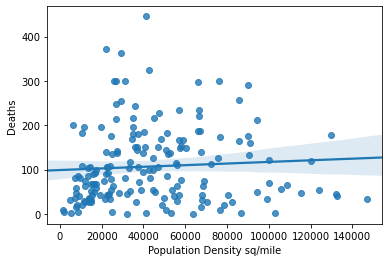

In [30]:
#regression plot of deaths vs population density to show if there is any correlation
y = df_final['Deaths']
x = df_final['Population Density sq/mile']
tips = df_final
ax = sns.regplot(x, y, data=tips)

In [31]:
#pearson coefficient of deaths and population density
r = np.corrcoef(x,y)
r

array([[1.        , 0.06672344],
       [0.06672344, 1.        ]])

Latitudes and Longitudes: Obtaining the geographical information for each zip code/neighborhood

In [32]:
#read in csv file with lats and longs
df2 = pd.read_csv('us-zip-code-latitude-and-longitude.csv', sep=';')
df2.head(10)

Zip           City State   Latitude  Longitude  Timezone  \
0  13650      Henderson    NY  43.822120 -76.212700        -5   
1  14219        Buffalo    NY  42.790708 -78.827170        -5   
2  14872    Pine Valley    NY  42.218224 -76.846940        -5   
3  10286       New York    NY  40.714231 -74.011895        -5   
4  12230         Albany    NY  42.614852 -73.970812        -5   
5  13697       Winthrop    NY  44.755383 -74.812130        -5   
6  14063       Fredonia    NY  42.425683 -79.337100        -5   
7  13090      Liverpool    NY  43.152017 -76.220680        -5   
8  13757  East Meredith    NY  42.411895 -74.913720        -5   
9  14413          Alton    NY  43.222735 -76.982149        -5   

   Daylight savings time flag              geopoint  
0                           1     43.82212,-76.2127  
1                           1   42.790708,-78.82717  
2                           1   42.218224,-76.84694  
3                           1  40.714231,-74.011895  
4                           1  42.614852,-73.970812  
5                           1   44.755383,-74.81213  
6                           1    42.425683,-79.3371  
7                           1   43.152017,-76.22068  
8                           1   42.411895,-74.91372  
9                           1  43.222735,-76.982149

In [33]:
#rename zip code column for merging
df2.rename(columns = {'Zip':'Zip Code'}, inplace = True)

#merge the two dataframes
df_fin = pd.merge(df2, df_final, on = 'Zip Code')

In [34]:
#drop unnecessary columns and renaming, and reclassifying types
df_fin.drop(['State','Timezone','Daylight savings time flag', 'geopoint', 'City'], axis = 1, inplace = True)
df_fin.rename(columns = {'Zip Code':'postalCode'}, inplace = True)
df_fin['postalCode'] = df_fin['postalCode'].astype(str)

#check data
df_fin.dtypes

postalCode                     object
Latitude                      float64
Longitude                     float64
Population Density sq/mile      int64
Name                           object
Borough                        object
Deaths                          int64
dtype: object

In [35]:
df_fin.shape

(174, 7)

In [36]:
df_fin.head()

postalCode   Latitude  Longitude  Population Density sq/mile  \
0      11360  40.780386  -73.78005                       13974   
1      11218  40.644552  -73.97595                       52602   
2      11233  40.676938  -73.91858                       51663   
3      11368  40.747106  -73.85838                       41367   
4      11697  40.560167  -73.90891                        1836   

                                               Name   Borough  Deaths  
0                                   Bayside (North)    Queens      27  
1                        Kensington/Windsor Terrace  Brooklyn     137  
2  Bedford-Stuyvesant (East)/Ocean Hill-Brownsville  Brooklyn     136  
3                               Corona/North Corona    Queens     446  
4                                      Breezy Point    Queens       4

Data Visualisation: Map the zip codes

In [37]:
address = 'New York, US'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [38]:
#get the polygons of the separate zip codes areas to plot a choropleth map from this website with a geojson file
!wget --quiet https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson

In [39]:
new_york_geo = 'nyc-zip-code-tabulation-areas-polygons.geojson' # geojson file

# create a plain world map
new_york_map = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

In [111]:
# create map of New York using latitude and longitude values
map_New_York = folium.Map(location=[latitude, longitude], width=1500, height=1500, zoom_start=10)


# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_fin['Deaths'].min(),
                              df_fin['Deaths'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


map_New_York.choropleth(
    geo_data = new_york_geo,
    data = df_fin,
    columns = ['postalCode', 'Deaths'],
    key_on = 'feature.properties.postalCode',
    threshold_scale = threshold_scale,
    fill_color = 'YlOrRd',
    fill_opacity = 0.8,
    line_opacity = 0.5,
    legend_name = 'Deaths'
)
    
# display map of number of deaths in NYC
map_New_York

In [41]:
#add zip code markers to choropleth map
for lat, lng, name, borough, deaths in zip(df_fin['Latitude'], df_fin['Longitude'], df_fin['Name'], df_fin['Borough'], df_fin['Deaths']):
    label = '{}, {}'.format(deaths, name, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill= True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_New_York)
    
#show map    
map_New_York

Using FourSquare: Obtaining the venue information of the NYC area

In [42]:
CLIENT_ID = 'NAZ1YYUVLSN0H32CGMPLGS13CSJSWH0QMKIQZ11TYYGDWBXT' # your Foursquare ID
CLIENT_SECRET = 'UFLGRMTN5UA3QMLZ3KRVOX1XV3UB1TXFBXZV51XEPAGO1IRK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NAZ1YYUVLSN0H32CGMPLGS13CSJSWH0QMKIQZ11TYYGDWBXT
CLIENT_SECRET:UFLGRMTN5UA3QMLZ3KRVOX1XV3UB1TXFBXZV51XEPAGO1IRK


In [43]:
#venue information for first zip code
df_fin.loc[0, 'Name']

'Bayside (North)'

In [44]:
neighborhood_latitude = df_fin.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_fin.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_fin.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bayside (North) are 40.780386, -73.78005.


In [45]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url2 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NAZ1YYUVLSN0H32CGMPLGS13CSJSWH0QMKIQZ11TYYGDWBXT&client_secret=UFLGRMTN5UA3QMLZ3KRVOX1XV3UB1TXFBXZV51XEPAGO1IRK&v=20180605&ll=40.780386,-73.78005&radius=500&limit=100'

In [46]:
results = requests.get(url2).json()
results

{'meta': {'code': 200, 'requestId': '5f3c1a9fbe770f153b0d5859'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Terrace',
  'headerFullLocation': 'Bay Terrace, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 38,
  'suggestedBounds': {'ne': {'lat': 40.7848860045, 'lng': -73.77411828898943},
   'sw': {'lat': 40.7758859955, 'lng': -73.78598171101058}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '563c11e8cd1059cb26ede621',
       'name': 'Stop & Shop',
       'location': {'address': '21315 26th Ave',
        'lat': 40.78014335191167,
        'lng': -73.7778952717781,
        'labeledLatLngs': [{'label': 'display

In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name              categories        lat        lng
0                 Stop & Shop             Supermarket  40.780143 -73.777895
1             The Health Nuts  Gluten-free Restaurant  40.778788 -73.778426
2           Bath & Body Works          Cosmetics Shop  40.778937 -73.777981
3               Boston Market     American Restaurant  40.780246 -73.776820
4  The Bay Terrace at Bayside           Shopping Mall  40.779110 -73.777177

In [49]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

38 venues were returned by Foursquare.


In [50]:
#create function to repeat on all different neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url3).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
newyork_venues = getNearbyVenues(names=df_fin['Name'],
                                   latitudes=df_fin['Latitude'],
                                   longitudes=df_fin['Longitude']
                                  )

Bayside (North)
Kensington/Windsor Terrace
Bedford-Stuyvesant (East)/Ocean Hill-Brownsville
Corona/North Corona
Breezy Point
Douglaston-Little Neck
Boerum Hill/Park Slope
Flushing/Murray Hill/Queensboro Hill
Kingsbridge/Marble Hill/Riverdale/Spuyten Duyvil
Airport/South Jamaica/Springfield Gardens/St. Albans
Ozone Park
Edgemere/Far Rockaway
Bellerose
Silver Lake/St. George
Concourse/Melrose
Brighton Beach/Coney Island/Seagate
Gravesend/Homecrest
Glendale/Ridgewood
Co-op City/Edenwald
Forest Hills
Bushwick/East Williamsburg
Cambria Heights
Kew Gardens Hills/Pomonok
East Williamsburg/Williamsburg (North)/Williamsburg (South)
Clinton Hill/Prospect Heights
Washington Heights (North)
East Midtown/Murray Hill
Richmond Hill
Flatlands/Midwood
Greenwich Village/SoHo
Great Kills
Central Harlem (North)/Washington Heights (South)
Jackson Heights
Concourse/Highbridge
Fieldston/North Riverdale/Riverdale
Hudson Square/Meatpacking District/West Village
Elm Park
Castle Hill/Clason Point/Soundview
Holli

In [52]:
print(newyork_venues.shape)
newyork_venues.head()

(7366, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bayside (North)              40.780386               -73.78005   
1  Bayside (North)              40.780386               -73.78005   
2  Bayside (North)              40.780386               -73.78005   
3  Bayside (North)              40.780386               -73.78005   
4  Bayside (North)              40.780386               -73.78005   

                        Venue  Venue Latitude  Venue Longitude  \
0                 Stop & Shop       40.780143       -73.777895   
1             The Health Nuts       40.778788       -73.778426   
2           Bath & Body Works       40.778937       -73.777981   
3               Boston Market       40.780246       -73.776820   
4  The Bay Terrace at Bayside       40.779110       -73.777177   

           Venue Category  
0             Supermarket  
1  Gluten-free Restaurant  
2          Cosmetics Shop  
3     American Restaurant  
4           Shopping Mall

In [53]:
#count number of venues per neighborhood
newyork_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Airport/East Elmhurst                                                   7   
Airport/South Jamaica/Springfield Gardens/St. A...                     16   
Allerton/Baychester/Pelham Gardens/Williamsbridge                      13   
Allerton/Norwood/Pelham Parkway/Williamsbridge                         10   
Alphabet City/East Village/Stuyvesant Town-Coop...                    100   
Annadale/Rossville                                                     10   
Arrochar/Midland Beach/Shore Acres/South Beach ...                     21   
Arverne/Broad Channel                                                   5   
Arverne/Edgemere                                                       23   
Astoria (North)                                                        39   
Astoria (North)/Astoria (South)                                        72   
Astoria (South)                                                        24   
Astoria (South)/Long Island City/Sunnyside                             44   
Auburndale/Fresh Meadows/Pomonok/Utopia                                31   
Auburndale/Murray Hill                                                 24   
Bath Beach/Bensonhurst/Gravesend                                       58   
Bath Beach/Dyker Heights                                               17   
Battery Park City                                                     162   
Bay Ridge/Fort Hamilton                                               100   
Bayside (North)                                                        38   
Bayside (North)/Bayside (South)                                        81   
Bayside (South)/Oakland Gardens                                        32   
Bedford-Stuyvesant (East)/Bushwick                                     34   
Bedford-Stuyvesant (East)/Ocean Hill-Brownsville                       31   
Bedford-Stuyvesant (West)/Clinton Hill/Fort Greene                     67   
Bedford-Stuyvesant (West)/Crown Heights (West)                         88   
Belle Harbor-Neponsit/Rockaway Park                                    23   
Bellerose                                                               9   
Bellerose/Douglaston-Little Neck                                        4   
Bellerose/Hollis Hills/Holliswood                                      25   
Belmont/Claremont/Mount Hope/Tremont                                   19   
Belmont/Fordham University/Kingsbridge                                 35   
Bensonhurst/Mapleton                                                   30   
Bergen Beach/Flatlands/Marine Park/Mill Basin                          29   
Bloomfield/Freshkills Park                                             12   
Boerum Hill/Park Slope                                                 93   
Borough Park                                                           17   
Breezy Point                                                            8   
Briarwood/Jamaica                                                      45   
Brighton Beach/Coney Island/Seagate                                    20   
Brighton Beach/Manhattan Beach/Sheepshead Bay                          66   
Brooklyn Heights/DUMBO/Downtown Brooklyn                               75   
Bushwick/East Williamsburg                                             74   
Cambria Heights                                                        12   
Canarsie                                                                9   
Carroll Gardens/Cobble Hill/Red Hook                                   65   
Castle Hill/Clason Point/Soundview                                      5   
Central Harlem (North)                                                 62   
Central Harlem (North)/East Harlem                                     16   
Central Harlem (North)/Washington Heights (South)                      28   
Central Harlem (South)                          

In [54]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 394 uniques categories.


In [55]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

newyork_onehot.head()

Yoga Studio  Accessories Store  Acupuncturist  Adult Boutique  \
0            0                  0              0               0   
1            0                  0              0               0   
2            0                  0              0               0   
3            0                  0              0               0   
4            0                  0              0               0   

   Afghan Restaurant  African Restaurant  Airport Tram  American Restaurant  \
0                  0                   0             0                    0   
1                  0                   0             0                    0   
2                  0                   0             0                    0   
3                  0                   0             0                    1   
4                  0                   0             0                    0   

   Animal Shelter  Antique Shop  Arcade  Arepa Restaurant  \
0               0             0       0                 0   
1               0             0       0                 0   
2               0             0       0                 0   
3               0             0       0                 0   
4               0             0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  \
0                    0                0          0           0           0   
1                    0                0          0           0           0   
2                    0                0          0           0           0   
3                    0                0          0           0           0   
4                    0                0          0           0           0   

   Baggage Locker  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0               0       0     0    0               0                 0   
1               0       0     0    0               0                 0   
2               0       0     0    0               0                 0   
3               0       0     0    0               0                 0   
4               0       0     0    0               0                 0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0                 0                   0      0                0         0   
1                 0                   0      0                0         0   
2                 0                   0      0                0         0   
3                 0                   0      0                0         0   
4                 0                   0      0                0         0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0            0           0              0                         0   
1            0           0              0                         0   
2            0           0              0                         0   
3            0           0              0                         0   
4            0           0              0                         0   

   Bike Shop  Bike Trail  Bi

In [56]:
newyork_onehot.shape

(7366, 394)

In [57]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
newyork_grouped.head()
newyork_grouped.shape

(162, 394)

In [58]:
#find the top 5 venues for each area
num_top_venues = 5

for hood in newyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Airport/East Elmhurst----
            venue  freq
0        Pharmacy  0.14
1           Diner  0.14
2     Flower Shop  0.14
3      Donut Shop  0.14
4  Ice Cream Shop  0.14


----Airport/South Jamaica/Springfield Gardens/St. Albans----
                             venue  freq
0                           Market  0.12
1  Southern / Soul Food Restaurant  0.12
2                             Bank  0.06
3                       Donut Shop  0.06
4                         Pharmacy  0.06


----Allerton/Baychester/Pelham Gardens/Williamsbridge----
                  venue  freq
0         Deli / Bodega  0.15
1  Caribbean Restaurant  0.15
2            Donut Shop  0.08
3          Dance Studio  0.08
4            Nail Salon  0.08


----Allerton/Norwood/Pelham Parkway/Williamsbridge----
                  venue  freq
0  Caribbean Restaurant   0.2
1         Deli / Bodega   0.1
2     Convenience Store   0.1
3           Supermarket   0.1
4  Gym / Fitness Center   0.1


----Alphabet City/East Village/Stuyves

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
#get the top ten venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                              Airport/East Elmhurst           Supermarket   
1  Airport/South Jamaica/Springfield Gardens/St. ...                Market   
2  Allerton/Baychester/Pelham Gardens/Williamsbridge  Caribbean Restaurant   
3     Allerton/Norwood/Pelham Parkway/Williamsbridge  Caribbean Restaurant   
4  Alphabet City/East Village/Stuyvesant Town-Coo...                   Bar   

             2nd Most Common Venue 3rd Most Common Venue  \
0                         Pharmacy        Ice Cream Shop   
1  Southern / Soul Food Restaurant            Donut Shop   
2                    Deli / Bodega            Nail Salon   
3           Furniture / Home Store           Supermarket   
4                     Cocktail Bar           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Flower Shop           Video Store                 Diner   
1           Bus Station              Bus Stop           Candy Store   
2           Pizza Place          Liquor Store              Pharmacy   
3  Gym / Fitness Center          Liquor Store         Historic Site   
4    Mexican Restaurant              Wine Bar           Pizza Place   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Donut Shop         Women's Store   Filipino Restaurant   
1  Fast Food Restaurant    Chinese Restaurant                  Bank   
2           Bus Station            Donut Shop                  Bank   
3                Bakery         Deli / Bodega     Convenience Store   
4    Italian Restaurant                Garden    Salon / Barbershop   

  10th Most Common Venue  
0                Exhibit  
1           Liquor Store  
2                    Spa  
3             Food Court  
4           Dessert Shop

In [61]:
#create new dataframe in order to help merge the two others together
df_for_cluster = df_fin[['Name', 'Population Density sq/mile']]
df_for_cluster.rename(columns = {'Name':'Neighborhood'}, inplace = True)
df_for_cluster.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Neighborhood  \
0                                   Bayside (North)   
1                        Kensington/Windsor Terrace   
2  Bedford-Stuyvesant (East)/Ocean Hill-Brownsville   
3                               Corona/North Corona   
4                                      Breezy Point   

   Population Density sq/mile  
0                       13974  
1                       52602  
2                       51663  
3                       41367  
4                        1836

In [62]:
#merge two dataframes on common element
newyork_grouped_clustering = pd.merge(newyork_grouped, df_for_cluster, on = 'Neighborhood')

In [63]:
newyork_grouped_clustering.head()

Neighborhood  Yoga Studio  \
0                              Airport/East Elmhurst          0.0   
1  Airport/South Jamaica/Springfield Gardens/St. ...          0.0   
2  Allerton/Baychester/Pelham Gardens/Williamsbridge          0.0   
3     Allerton/Norwood/Pelham Parkway/Williamsbridge          0.0   
4  Alphabet City/East Village/Stuyvesant Town-Coo...          0.0   

   Accessories Store  Acupuncturist  Adult Boutique  Afghan Restaurant  \
0                0.0            0.0             0.0                0.0   
1                0.0            0.0             0.0                0.0   
2                0.0            0.0             0.0                0.0   
3                0.0            0.0             0.0                0.0   
4                0.0            0.0             0.0                0.0   

   African Restaurant  Airport Tram  American Restaurant  Animal Shelter  \
0                 0.0           0.0                 0.00             0.0   
1                 0.0           0.0                 0.00             0.0   
2                 0.0           0.0                 0.00             0.0   
3                 0.0           0.0                 0.00             0.0   
4                 0.0           0.0                 0.02             0.0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0     0.0               0.0                    0.00   
1           0.0     0.0               0.0                    0.00   
2           0.0     0.0               0.0                    0.00   
3           0.0     0.0               0.0                    0.00   
4           0.0     0.0               0.0                    0.01   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0          0.0         0.0                  0.0              0.00   
1          0.0         0.0                  0.0              0.00   
2          0.0         0.0                  0.0              0.00   
3          0.0         0.0                  0.0              0.00   
4          0.0         0.0                  0.0              0.01   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                 0.0         0.0                    0.0                  0.0   
1                 0.0         0.0                    0.0                  0.0   
2                 0.0         0.0                    0.0                  0.0   
3                 0.0         0.0                    0.0                  0.0   
4                 0.0         0.0                    0.0                  0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Locker  Bakery  \
0              0.0        0.0         0.0        0.00             0.0    0.00   
1              0.0        0.0         0.0        0.00             0.0    0.00   
2              0.0        0.0         0.0        0.00             0.0    0.00   
3              0.0        0.0         0.0        0.00             0.0    0.10   
4              0.0        0.0         0.0        0.01             0.0    0.01   

       Bank   Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0  0.000000  0.00             0.0               0.0               0.0   
1  0.062500  0.00             0.0               0.0               0.0   
2  0.076923  0.00             0.0               0.0               0.0   
3  0.000000  0.00             0.0               0.0               0.0   
4  0.000000  0.09             0.0               0.0               0.0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                 0.0    0.0              0.0      0.00          0.0   
1                 0.0    0.0              0.0      0.00          0.0   
2                 0.0    0.0              0.0      0.00          0.0   
3                 0.0    0.0              0.0      0.00          0.0   
4                 0.0    0.0              0.0      0.02          0.0   

   Beer Store  Big Box Store  Bike Rental / Bik

In [64]:
# set number of clusters
kclusters = 11

newyork_grouped_clustering = newyork_grouped_clustering.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]

array([0, 8, 6, 7, 9, 3, 3, 3, 8, 7, 4, 7, 3, 8, 8], dtype=int32)

In [65]:
neighborhoods_venues_sorted.shape

(162, 11)

In [66]:
newyork_grouped_clustering.head()

Yoga Studio  Accessories Store  Acupuncturist  Adult Boutique  \
0          0.0                0.0            0.0             0.0   
1          0.0                0.0            0.0             0.0   
2          0.0                0.0            0.0             0.0   
3          0.0                0.0            0.0             0.0   
4          0.0                0.0            0.0             0.0   

   Afghan Restaurant  African Restaurant  Airport Tram  American Restaurant  \
0                0.0                 0.0           0.0                 0.00   
1                0.0                 0.0           0.0                 0.00   
2                0.0                 0.0           0.0                 0.00   
3                0.0                 0.0           0.0                 0.00   
4                0.0                 0.0           0.0                 0.02   

   Animal Shelter  Antique Shop  Arcade  Arepa Restaurant  \
0             0.0           0.0     0.0               0.0   
1             0.0           0.0     0.0               0.0   
2             0.0           0.0     0.0               0.0   
3             0.0           0.0     0.0               0.0   
4             0.0           0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                    0.00          0.0         0.0                  0.0   
1                    0.00          0.0         0.0                  0.0   
2                    0.00          0.0         0.0                  0.0   
3                    0.00          0.0         0.0                  0.0   
4                    0.01          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0              0.00                 0.0         0.0                    0.0   
1              0.00                 0.0         0.0                    0.0   
2              0.00                 0.0         0.0                    0.0   
3              0.00                 0.0         0.0                    0.0   
4              0.01                 0.0         0.0                    0.0   

   Austrian Restaurant  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  \
0                  0.0              0.0        0.0         0.0        0.00   
1                  0.0              0.0        0.0         0.0        0.00   
2                  0.0              0.0        0.0         0.0        0.00   
3                  0.0              0.0        0.0         0.0        0.00   
4                  0.0              0.0        0.0         0.0        0.01   

   Baggage Locker  Bakery      Bank   Bar  Baseball Field  Baseball Stadium  \
0             0.0    0.00  0.000000  0.00             0.0               0.0   
1             0.0    0.00  0.062500  0.00             0.0               0.0   
2             0.0    0.00  0.076923  0.00             0.0               0.0   
3             0.0    0.10  0.000000  0.00             0.0               0.0   
4             0.0    0.01  0.000000  0.09             0.0               0.0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0      0.00   
1               0.0                 0.0    0.0              0.0      0.00   
2               0.0                 0.0    0.0              0.0      0.00   
3               0.0                 0.0    0.0              0.0      0.00   
4               0.0                 0.0    0.0              0.0      0.02   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0          0.0        0.00            0.0                       0.0   
1          0.0        0.00            0.0                       0.0   
2          0.0        0.00            0.0                       0.0   
3          0.0        0.00            0.0                       0.0   
4          0.0        0.01            0.0                       0.0   

In [67]:
#merge into a dataframe on the common element
nyc_venues_final = pd.merge(newyork_grouped_clustering, df_fin, on = 'Population Density sq/mile')

In [68]:
nyc_venues_final.rename(columns = {'Name':'Neighborhood'}, inplace = True)

In [69]:
nyc_venues_final.head()

Yoga Studio  Accessories Store  Acupuncturist  Adult Boutique  \
0          0.0                0.0            0.0             0.0   
1          0.0                0.0            0.0             0.0   
2          0.0                0.0            0.0             0.0   
3          0.0                0.0            0.0             0.0   
4          0.0                0.0            0.0             0.0   

   Afghan Restaurant  African Restaurant  Airport Tram  American Restaurant  \
0                0.0                 0.0           0.0                 0.00   
1                0.0                 0.0           0.0                 0.00   
2                0.0                 0.0           0.0                 0.00   
3                0.0                 0.0           0.0                 0.00   
4                0.0                 0.0           0.0                 0.02   

   Animal Shelter  Antique Shop  Arcade  Arepa Restaurant  \
0             0.0           0.0     0.0               0.0   
1             0.0           0.0     0.0               0.0   
2             0.0           0.0     0.0               0.0   
3             0.0           0.0     0.0               0.0   
4             0.0           0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                    0.00          0.0         0.0                  0.0   
1                    0.00          0.0         0.0                  0.0   
2                    0.00          0.0         0.0                  0.0   
3                    0.00          0.0         0.0                  0.0   
4                    0.01          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0              0.00                 0.0         0.0                    0.0   
1              0.00                 0.0         0.0                    0.0   
2              0.00                 0.0         0.0                    0.0   
3              0.00                 0.0         0.0                    0.0   
4              0.01                 0.0         0.0                    0.0   

   Austrian Restaurant  Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  \
0                  0.0              0.0        0.0         0.0        0.00   
1                  0.0              0.0        0.0         0.0        0.00   
2                  0.0              0.0        0.0         0.0        0.00   
3                  0.0              0.0        0.0         0.0        0.00   
4                  0.0              0.0        0.0         0.0        0.01   

   Baggage Locker  Bakery      Bank   Bar  Baseball Field  Baseball Stadium  \
0             0.0    0.00  0.000000  0.00             0.0               0.0   
1             0.0    0.00  0.062500  0.00             0.0               0.0   
2             0.0    0.00  0.076923  0.00             0.0               0.0   
3             0.0    0.10  0.000000  0.00             0.0               0.0   
4             0.0    0.01  0.000000  0.09             0.0               0.0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0      0.00   
1               0.0                 0.0    0.0              0.0      0.00   
2               0.0                 0.0    0.0              0.0      0.00   
3               0.0                 0.0    0.0              0.0      0.00   
4               0.0                 0.0    0.0              0.0      0.02   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0          0.0        0.00            0.0                       0.0   
1          0.0        0.00            0.0                       0.0   
2          0.0        0.00            0.0                       0.0   
3          0.0        0.00            0.0                       0.0   
4          0.0        0.01            0.0                       0.0   

In [70]:
#final merge into a new dataframe (bit messy how I have merged these)
nyc_venues_final2 = pd.merge(neighborhoods_venues_sorted, nyc_venues_final, on = 'Neighborhood')

In [71]:
# add clustering labels
nyc_venues_final2.insert(0, 'Cluster Labels', kmeans.labels_)

In [72]:
nyc_venues_final2.head()

Cluster Labels                                       Neighborhood  \
0               0                              Airport/East Elmhurst   
1               8  Airport/South Jamaica/Springfield Gardens/St. ...   
2               6  Allerton/Baychester/Pelham Gardens/Williamsbridge   
3               7     Allerton/Norwood/Pelham Parkway/Williamsbridge   
4               9  Alphabet City/East Village/Stuyvesant Town-Coo...   

  1st Most Common Venue            2nd Most Common Venue  \
0           Supermarket                         Pharmacy   
1                Market  Southern / Soul Food Restaurant   
2  Caribbean Restaurant                    Deli / Bodega   
3  Caribbean Restaurant           Furniture / Home Store   
4                   Bar                     Cocktail Bar   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop           Flower Shop           Video Store   
1            Donut Shop           Bus Station              Bus Stop   
2            Nail Salon           Pizza Place          Liquor Store   
3           Supermarket  Gym / Fitness Center          Liquor Store   
4           Coffee Shop    Mexican Restaurant              Wine Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Diner            Donut Shop         Women's Store   
1           Candy Store  Fast Food Restaurant    Chinese Restaurant   
2              Pharmacy           Bus Station            Donut Shop   
3         Historic Site                Bakery         Deli / Bodega   
4           Pizza Place    Italian Restaurant                Garden   

  9th Most Common Venue 10th Most Common Venue  Yoga Studio  \
0   Filipino Restaurant                Exhibit          0.0   
1                  Bank           Liquor Store          0.0   
2                  Bank                    Spa          0.0   
3     Convenience Store             Food Court          0.0   
4    Salon / Barbershop           Dessert Shop          0.0   

   Accessories Store  Acupuncturist  Adult Boutique  Afghan Restaurant  \
0                0.0            0.0             0.0                0.0   
1                0.0            0.0             0.0                0.0   
2                0.0            0.0             0.0                0.0   
3                0.0            0.0             0.0                0.0   
4                0.0            0.0             0.0                0.0   

   African Restaurant  Airport Tram  American Restaurant  Animal Shelter  \
0                 0.0           0.0                 0.00             0.0   
1                 0.0           0.0                 0.00             0.0   
2                 0.0           0.0                 0.00             0.0   
3                 0.0           0.0                 0.00             0.0   
4                 0.0           0.0                 0.02             0.0   

   Antique Shop  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0     0.0               0.0                    0.00   
1           0.0     0.0               0.0                    0.00   
2           0.0     0.0               0.0                    0.00   
3           0.0     0.0               0.0                    0.00   
4           0.0     0.0               0.0                    0.01   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0          0.0         0.0                  0.0              0.00   
1          0.0         0.0                  0.0              0.00   
2          0.0         0.0                  0.0              0.00   
3          0.0         0.0                  0.0              0.00   
4          0.0         0.0                  0.0              0.01   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                 0.0         0.0                    0.0                  0.0   
1                 0.0         0.0                    0.0                  0.0   
2

In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_venues_final2['Latitude'], nyc_venues_final2['Longitude'], nyc_venues_final2['Neighborhood'], nyc_venues_final2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Analyse Each Zip Code: Each zip code can now be analysed to see how they are grouped together in terms on similar occurrences of venues and population density - both key factors in COVID-19 transmission

In [74]:
#this is cluster 0, each cluster follows on accordingly
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 0, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood 1st Most Common Venue  \
0                                Airport/East Elmhurst           Supermarket   
16                            Bath Beach/Dyker Heights                Bakery   
19                             Bay Ridge/Fort Hamilton                   Spa   
39                                   Briarwood/Jamaica           Pizza Place   
41       Brighton Beach/Manhattan Beach/Sheepshead Bay           Pizza Place   
42            Brooklyn Heights/DUMBO/Downtown Brooklyn                   Gym   
57                          Chelsea/NoMad/West Chelsea          Dance Studio   
71                         Cypress Hills/East New York           Pizza Place   
76         East Flatbush (North)/East Flatbush (South)                  Bank   
83   East Williamsburg/Williamsburg (North)/William...                   Bar   
84                                  Edenwald/Wakefield           Supermarket   
89                                  Financial District           Coffee Shop   
97                                        Forest Hills                Bakery   
99            Gerritsen Beach/Homecrest/Sheepshead Bay           Pizza Place   
101                 Gowanus/Park Slope/Windsor Terrace                   Bar   
103                                Gravesend/Homecrest    Italian Restaurant   
117                  Inwood/Washington Heights (North)                Lounge   
122                                        Kew Gardens    Chinese Restaurant   
139                             Mott Haven/Port Morris                   Gym   
143                                         Ozone Park           Pizza Place   
172                                          Woodhaven         Deli / Bodega   
173                                           Woodside         Grocery Store   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Pharmacy        Ice Cream Shop           Flower Shop   
16             Bagel Shop     Food & Drink Shop                  Bank   
19            Pizza Place        Cosmetics Shop    Italian Restaurant   
39   Fast Food Restaurant           Bus Station            Donut Shop   
41     Russian Restaurant      Sushi Restaurant       Harbor / Marina   
42          Deli / Bodega           Pizza Place                  Park   
57                  Hotel           Salad Place           Coffee Shop   
71            Supermarket         Deli / Bodega        Discount Store   
76          Deli / Bodega     Mobile Phone Shop  Caribbean Restaurant   
83            Pizza Place              Wine Bar           Coffee Shop   
84            Gas Station    Chinese Restaurant            Donut Shop   
89            Pizza Place  Gym / Fitness Center                 Hotel   
97            Yoga Studio                   Bar         Grocery Store   
99         Cosmetics Shop                  Bank            Donut Shop   
101            Bagel Shop           Coffee Shop                  Café   
103           Pizza Place                Lounge    Chinese Restaurant   
117    Mexican Restaurant                  Café            Restaurant   
122     Indian Restaurant           Pizza Place                   Bar   
139            Donut Shop    Spanish Restaurant           Pizza Place   
143         Deli / Bodega          Liquor Store            Food Truck   
172                  Park           Pizza Place                  Bank   
173                   Bar           Pizza Place                Bakery   

         5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                  Video Store                 Diner            Donut Shop   
16              Sandwich Place              Pharmacy     Mobile Phone Shop   
19        Gym / Fitness Center                   Bar      Greek Restaurant   
39            Tapas Restaurant        Sandwich Place                  Bank   
41                Dessert Shop            Restaurant           Coffee Shop   
42               Grocery Store                 Plaza 

In [75]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 1, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood 1st Most Common Venue  \
51                              Central Harlem (South)                  Park   
129                                     Lincoln Square  Gym / Fitness Center   
132  Manhattan Valley/Morningside Heights/Upper Wes...    Mexican Restaurant   
163                          Upper East Side/Yorkville    Italian Restaurant   
167                         Washington Heights (North)           Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue  \
51            Coffee Shop            Playground   
129                  Park    Italian Restaurant   
132                   Spa                   Bar   
163           Coffee Shop           Pizza Place   
167                  Park                   Bar   

               4th Most Common Venue 5th Most Common Venue  \
51   Southern / Soul Food Restaurant    Mexican Restaurant   
129                      Coffee Shop               Theater   
132                      Pizza Place                Bakery   
163               Mexican Restaurant                   Bar   
167                       Donut Shop   Fried Chicken Joint   

    6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
51                  Plaza         African Restaurant           Supermarket   
129                   Gym        American Restaurant         Grocery Store   
132            Bagel Shop  Latin American Restaurant           Coffee Shop   
163                   Gym            Thai Restaurant                Bakery   
167               Dog Run               Burger Joint                Garden   

    9th Most Common Venue 10th Most Common Venue  Longitude  
51                 Bakery     Seafood Restaurant  -73.95471  
129             Wine Shop               Wine Bar  -73.98285  
132   Japanese Restaurant                   Park  -73.96811  
163  Gym / Fitness Center       Sushi Restaurant  -73.95039  
167    Seafood Restaurant     Chinese Restaurant  -73.92853

In [76]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 2, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood      1st Most Common Venue  \
56                                        Chelsea                Coffee Shop   
59                      Chinatown/Lower East Side         Mexican Restaurant   
61                           Claremont/Morrisania                 Donut Shop   
78                                    East Harlem         Mexican Restaurant   
108                  Hamilton Heights/West Harlem              Deli / Bodega   
118                               Jackson Heights  Latin American Restaurant   
125                    Kips Bay/Murray Hill/NoMad                      Hotel   
131                              Long Island City           Department Store   
136  Morris Heights/Mount Hope/University Heights                Pizza Place   
169                    Washington Heights (South)                Pizza Place   

         2nd Most Common Venue      3rd Most Common Venue  \
56         American Restaurant                Yoga Studio   
59                 Coffee Shop               Cocktail Bar   
61                      Bakery              Deli / Bodega   
78                    Pharmacy              Deli / Bodega   
108                        Bar                Coffee Shop   
118  South American Restaurant                Coffee Shop   
125                        Bar                Coffee Shop   
131             Discount Store                 Shoe Store   
136                Bus Station         Chinese Restaurant   
169         Mexican Restaurant  Latin American Restaurant   

         4th Most Common Venue 5th Most Common Venue   6th Most Common Venue  \
56        Gym / Fitness Center    Seafood Restaurant                  Bakery   
59                         Bar                Bakery             Pizza Place   
61                         Gym                School          Ice Cream Shop   
78   Latin American Restaurant       Thai Restaurant             Pizza Place   
108         Chinese Restaurant                  Café             Pizza Place   
118            Thai Restaurant    Mexican Restaurant                  Bakery   
125                        Gym            Bagel Shop    Gym / Fitness Center   
131              Women's Store     Mobile Phone Shop  Furniture / Home Store   
136                       Bank         Deli / Bodega              Food Truck   
169             Sandwich Place                Bakery         Thai Restaurant   

    7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
56     Italian Restaurant         Grocery Store               Cocktail Bar   
59         Sandwich Place        Ice Cream Shop                       Café   
61                  Hotel  Fast Food Restaurant             Discount Store   
78             Donut Shop        Sandwich Place                Supermarket   
108    Mexican Restaurant           Yoga Studio               Burger Joint   
118      Arepa Restaurant                 Diner  Cajun / Creole Restaurant   
125           Salad Place     Indian Restaurant             Ice Cream Shop   
131            Kids Store        Clothing Store            Warehouse Store   
136           Supermarket     Mobile Phone Shop               Optical Shop   
169             Bookstore                School                Supermarket   

    10th Most Common Venue  Longitude  
56      Salon / Barbershop -74.000120  
59     Japanese Restaurant -73.987000  
61           Women's Store -73.908560  
78                     Gym -73.945750  
108         Sandwich Place -73.948790  
118    Peruvian Restaurant -73.884330  
125     Mexican Restaurant -73.977590  
131          Big Box Store -73.870779  
136             Donut Shop -73.912140  
169      Korean Restaurant -73.941540

In [77]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 3, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood 1st Most Common Venue  \
5                                   Annadale/Rossville            Restaurant   
6    Arrochar/Midland Beach/Shore Acres/South Beach...              Bus Stop   
7                                Arverne/Broad Channel            Bagel Shop   
12          Astoria (South)/Long Island City/Sunnyside           Coffee Shop   
34       Bergen Beach/Flatlands/Marine Park/Mill Basin    Chinese Restaurant   
35                          Bloomfield/Freshkills Park    Italian Restaurant   
38                                        Breezy Point                   Bar   
53                     Charleston/Prince's Bay/Woodrow                Hostel   
60                                         City Island    Seafood Restaurant   
74                              Douglaston-Little Neck                  Bank   
75                              Douglaston-Little Neck                  Bank   
88                 Fieldston/North Riverdale/Riverdale           Bus Station   
102           Graniteville/Mariner's Harbor/Port Ivory    Spanish Restaurant   
116                                        Hunts Point    Chinese Restaurant   
128     Lighthouse Hill/Midland Beach/New Dorp/Oakwood    Italian Restaurant   
140                                 New Dorp/Todt Hill         Deli / Bodega   
153                             Silver Lake/St. George              Bus Stop   
161                                        Tottenville    Italian Restaurant   
166                                 Wakefield/Woodlawn           Pizza Place   

     2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
5      American Restaurant         Train Station              Pharmacy   
6                     Park            Bagel Shop           Pizza Place   
7      Sporting Goods Shop        Clothing Store        Sandwich Place   
12             Pizza Place         Deli / Bodega    Mexican Restaurant   
34      Italian Restaurant   Japanese Restaurant           Pizza Place   
35                Bus Stop    Chinese Restaurant                  Pool   
38                    Café      Basketball Court     Convenience Store   
53          Baseball Field             Juice Bar            Donut Shop   
60           Boat or Ferry    Italian Restaurant            Donut Shop   
74    Gym / Fitness Center    Chinese Restaurant              Pharmacy   
75    Gym / Fitness Center    Chinese Restaurant              Pharmacy   
88               Wine Shop         Shopping Mall            Playground   
102         Discount Store  Fast Food Restaurant         Deli / Bodega   
116            Supermarket  Gym / Fitness Center            Restaurant   
128  Vietnamese Restaurant                Buffet      Sushi Restaurant   
140             Bagel Shop       Automotive Shop                  Park   
153             Playground                  Park            Bagel Shop   
161             Bagel Shop         Deli / Bodega        Cosmetics Shop   
166            Gas Station            Playground    Italian Restaurant   

          5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
5                   Pizza Place                 Diner      Business Service   
6                 Deli / Bodega        Cosmetics Shop      Business Service   
7                      Dive Bar           Film Studio               Exhibit   
12                   Donut Shop                 Hotel                  Park   
34               Discount Store   Martial Arts School                  Bank   
35               Sandwich Place           Pizza Place            Bagel Shop   
38               Clothing Store                 Diner         Grocery Store   
53                Women's Store            Eye Doctor               Factory   
60                  Fish Market                  Park                   Bar   
74               Ice Cream Shop   American Restaurant        Sandwich Place   
75               Ice Cream Shop   American Restaurant        Sandwich Place   
88   Financi

In [78]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 4, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood 1st Most Common Venue  \
10                     Astoria (North)/Astoria (South)            Hookah Bar   
23                  Bedford-Stuyvesant (East)/Bushwick           Coffee Shop   
24    Bedford-Stuyvesant (East)/Ocean Hill-Brownsville  Fast Food Restaurant   
26      Bedford-Stuyvesant (West)/Crown Heights (West)  Caribbean Restaurant   
33                                Bensonhurst/Mapleton    Chinese Restaurant   
36                              Boerum Hill/Park Slope           Coffee Shop   
43                          Bushwick/East Williamsburg                   Bar   
50   Central Harlem (North)/Washington Heights (South)    Chinese Restaurant   
54                       Charlotte Gardens/Hunts Point              Pharmacy   
69                                Crown Heights (East)                  Bank   
80                            East Midtown/Murray Hill           Coffee Shop   
110                   Hell's Kitchen/Midtown Manhattan               Theater   
111                   Hell's Kitchen/Midtown Manhattan               Theater   
115    Hudson Square/Meatpacking District/West Village    Italian Restaurant   
121                         Kensington/Windsor Terrace       Thai Restaurant   
130                                     Lincoln Square  Gym / Fitness Center   
138                                         Mott Haven           Pizza Place   
141                             Ocean Hill-Brownsville            Restaurant   
144  Parkchester/Pelham Parkway/Van Nest/Westcheste...                   Gym   
160                                        Sunset Park           Pizza Place   
171                               Williamsburg (South)           Pizza Place   

     2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
10             Pizza Place                   Bar            Deli / Bodega   
23    Fast Food Restaurant           Pizza Place       Spanish Restaurant   
24                    Food   Fried Chicken Joint            Deli / Bodega   
26             Coffee Shop                   Bar            Grocery Store   
33       Convenience Store                  Bank       Italian Restaurant   
36                     Bar           Pizza Place                   Bakery   
43             Pizza Place           Coffee Shop       Mexican Restaurant   
50       Indian Restaurant         Deli / Bodega              Coffee Shop   
54       Mobile Phone Shop                  Park     Fast Food Restaurant   
69      Chinese Restaurant         Deli / Bodega                     Café   
80     Japanese Restaurant                 Hotel                   Bakery   
110                  Hotel           Coffee Shop              Pizza Place   
111                  Hotel           Coffee Shop              Pizza Place   
115               Wine Bar   American Restaurant  New American Restaurant   
121          Grocery Store                  Café              Pizza Place   
130                   Park    Italian Restaurant              Coffee Shop   
138         Discount Store    Mexican Restaurant              Bus Station   
141  Performing Arts Venue                  Pool           Farmers Market   
144            Bus Station            Restaurant                    Plaza   
160     Mexican Restaurant                Bakery              Coffee Shop   
171                 Bakery           Record Shop           Discount Store   

         5th Most Common Venue            6th Most Common Venue  \
10                 Coffee Shop                        Irish Pub   
23               Smoothie Shop                           Bakery   
24           Convenience Store                      Supermarket   
26                        Café               Seafood Restaurant   
33               Metro Station                      Pizza Place   
36              Cosmetics Shop             Gym / Fitness Center   
43                 Yoga Studio                         Dive Bar   
50                         Spa                    

In [79]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 5, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood  \
17                                   Battery Park City   
18                                   Battery Park City   
31                Belmont/Claremont/Mount Hope/Tremont   
32              Belmont/Fordham University/Kingsbridge   
37                                        Borough Park   
49                  Central Harlem (North)/East Harlem   
52   Central Harlem (South)/Morningside Heights/Wes...   
58                        Chinatown/Financial District   
65                                Concourse/Highbridge   
70      Crown Heights (West)/Prospect Lefferts Gardens   
79                                        East Midtown   
87                                            Elmhurst   
91                  Flatbush/Prospect Lefferts Gardens   
92                          Flatiron/Gramercy/Kips Bay   
96              Fordham/Kingsbridge/University Heights   
106                             Greenwich Village/SoHo   
154                                          Soundview   
158                                          Sunnyside   
165                                    Upper West Side   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
17                        Park                 Hotel           Coffee Shop   
18                        Park                 Hotel           Coffee Shop   
31                  Donut Shop  Fast Food Restaurant             Nightclub   
32                       Plaza        Sandwich Place           Pizza Place   
37               Deli / Bodega            Restaurant           Bus Station   
49                         Gym                  Park                  Café   
52          Italian Restaurant           Coffee Shop    Seafood Restaurant   
58                 Coffee Shop    Italian Restaurant                  Café   
65                    Pharmacy           Pizza Place  Fast Food Restaurant   
70        Caribbean Restaurant                  Café                Bakery   
79          Italian Restaurant           Coffee Shop                Bakery   
87                      Bakery  Fast Food Restaurant              Pharmacy   
91           Mobile Phone Shop  Caribbean Restaurant        Discount Store   
92           Indian Restaurant                   Bar    Italian Restaurant   
96                 Pizza Place    Chinese Restaurant                 Diner   
106         Italian Restaurant        Clothing Store      Sushi Restaurant   
154  Latin American Restaurant    Spanish Restaurant                   Bar   
158                Pizza Place                   Bar         Grocery Store   
165         Italian Restaurant           Coffee Shop                  Café   

      4th Most Common Venue      5th Most Common Venue 6th Most Common Venue  \
17               Playground         Italian Restaurant                   Gym   
18               Playground         Italian Restaurant                   Gym   
31                     Bank                       Park           Pizza Place   
32              Coffee Shop                 Donut Shop                  Bank   
37              Supermarket                     Bistro     Mobile Phone Shop   
49              Pizza Place       Gym / Fitness Center               Library   
52            Deli / Bodega         Chinese Restaurant                  Café   
58                    Hotel        American Restaurant        Sandwich Place   
65            Grocery Store         Seafood Restaurant           Bus Station   
70              Yoga Studio        Empanada Restaurant      Tapas Restaurant   
79        French Restaurant                      Hotel   American Restaurant   
87   Furniture / Home Store             Sandwich Place                  Café   
91                     Bank                    Theater                   Bar   
92      American Restaurant                Coffee Shop           Pizza Place   
96              Coffee Shop  Latin American Restaurant            Donut Shop   
106                    Café             

In [80]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 6, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood  \
2    Allerton/Baychester/Pelham Gardens/Williamsbridge   
40                 Brighton Beach/Coney Island/Seagate   
45                                            Canarsie   
46                Carroll Gardens/Cobble Hill/Red Hook   
47                  Castle Hill/Clason Point/Soundview   
63                                 Co-op City/Edenwald   
72                         Cypress Hills/East New York   
73                                    Ditmars Steinway   
77                                         East Harlem   
81                                       East New York   
85                               Edgemere/Far Rockaway   
94                                Flushing/Murray Hill   
100                                 Glendale/Ridgewood   
105                                         Greenpoint   
109                   Hell's Kitchen/Midtown Manhattan   
112            Hillcrest/Jamaica Estates/Jamaica Hills   
113                                  Hollis/Holliswood   
119                      Jackson Heights/Rikers Island   
120                                            Jamaica   
137          Morris Park/Pelham Bay/Westchester Square   
142                                         Ozone Park   
146                                     Queens Village   
147                                     Queens Village   
149                                      Richmond Hill   
155                     South Jamaica/South Ozone Park   
156                                   South Ozone Park   
157                                         St. Albans   
159                                        Sunset Park   

         1st Most Common Venue            2nd Most Common Venue  \
2         Caribbean Restaurant                    Deli / Bodega   
40               Deli / Bodega                      Supermarket   
45                        Bank                              Gym   
46                         Bar                      Pizza Place   
47              Baseball Field               Spanish Restaurant   
63                    Pharmacy                      Pizza Place   
72                 Pizza Place                      Supermarket   
73            Greek Restaurant               Italian Restaurant   
77          Mexican Restaurant                         Pharmacy   
81                 Bus Station                         Bus Stop   
85                  Donut Shop                    Deli / Bodega   
94           Korean Restaurant                      Supermarket   
100              Deli / Bodega                      Pizza Place   
105                Coffee Shop                      Yoga Studio   
109                    Theater                            Hotel   
112                 Donut Shop               Chinese Restaurant   
113         Chinese Restaurant              Fried Chicken Joint   
119                      Hotel              Fried Chicken Joint   
120              Deli / Bodega                      Pizza Place   
137                   Pharmacy               Italian Restaurant   
142                Pizza Place                    Deli / Bodega   
146             Discount Store                             Bank   
147             Discount Store                             Bank   
149  Latin American Restaurant                             Bank   
155         Chinese Restaurant  Southern / Soul Food Restaurant   
156         Seafood Restaurant                   Breakfast Spot   
157               Intersection                      Video Store   
159                Pizza Place               Mexican Restaurant   

    3rd Most Common Venue            4th Most Common Venue  \
2              Nail Salon                      Pizza Place   
40                   Park                     Intersection   
45     Chinese Restaurant                 Video Game Store   
46     Italian Restaurant                Food & Drink Shop   
47            Gas Station                      Pizza Place   
63            Music Venue                  

In [81]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 7, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood  \
3       Allerton/Norwood/Pelham Parkway/Williamsbridge   
9                                      Astoria (North)   
11                                     Astoria (South)   
15                    Bath Beach/Bensonhurst/Gravesend   
25   Bedford-Stuyvesant (West)/Clinton Hill/Fort Gr...   
55       Charlotte Gardens/Tremont/Van Nest/West Farms   
62                       Clinton Hill/Prospect Heights   
66                                   Concourse/Melrose   
67                                 Corona/North Corona   
93                                   Flatlands/Midwood   
95                Flushing/Murray Hill/Queensboro Hill   
114            Hudson Square/Little Italy/SoHo/TriBeCa   
124   Kingsbridge/Marble Hill/Riverdale/Spuyten Duyvil   
135                                            Midwood   
148                                          Rego Park   
150                     Richmond Hill/South Ozone Park   
151                                   Roosevelt Island   
162                                            TriBeCa   

           1st Most Common Venue      2nd Most Common Venue  \
3           Caribbean Restaurant     Furniture / Home Store   
9                    Pizza Place              Deli / Bodega   
11            Chinese Restaurant              Deli / Bodega   
15                   Pizza Place         Chinese Restaurant   
25            Mexican Restaurant                Yoga Studio   
55                          Park               Liquor Store   
62                           Bar         Mexican Restaurant   
66                Ice Cream Shop                Pizza Place   
67            Mexican Restaurant  Latin American Restaurant   
93             Mobile Phone Shop        Sporting Goods Shop   
95            Chinese Restaurant          Indian Restaurant   
114         Gym / Fitness Center                   Boutique   
124                  Pizza Place                        Gym   
135                  Pizza Place                     Bakery   
148  Eastern European Restaurant              Grocery Store   
150         Caribbean Restaurant                       Bank   
151                         Park                      Plaza   
162                  Coffee Shop       Gym / Fitness Center   

         3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3                  Supermarket  Gym / Fitness Center          Liquor Store   
9                          Bar           Coffee Shop                Bakery   
11   Latin American Restaurant     Food & Drink Shop                  Café   
15                        Bank       Bubble Tea Shop  Cantonese Restaurant   
25                   Wine Shop                 Diner            Restaurant   
55                 Pizza Place           Bus Station           Supermarket   
62                        Café             Wine Shop          Cocktail Bar   
66                     Theater    Mexican Restaurant                   Bar   
67                      Bakery           Pizza Place    Italian Restaurant   
93                 Coffee Shop        Shipping Store  Caribbean Restaurant   
95                      Bakery    Dim Sum Restaurant           Supermarket   
114                        Spa           Men's Store    Italian Restaurant   
124         Spanish Restaurant            Donut Shop           Supermarket   
135                       Bank      Sushi Restaurant         Grocery Store   
148                Supermarket              Pharmacy        Farmers Market   
150                 Donut Shop         Deli / Bodega   Fried Chicken Joint   
151                Dry Cleaner     Kosher Restaurant  Gym / Fitness Center   
162                      Hotel                  Café                  Park   

    6th Most Common Venue 7th Most Common Venue  \
3           Historic Site                Bakery   
9        Greek Restaurant    Chinese Restaurant   
11   Brazilian Restaurant      Sushi Restaurant   
15                 Bakery     Mobile Phone Shop   
25 

In [82]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 8, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood  \
1    Airport/South Jamaica/Springfield Gardens/St. ...   
8                                     Arverne/Edgemere   
13             Auburndale/Fresh Meadows/Pomonok/Utopia   
14                              Auburndale/Murray Hill   
20                                     Bayside (North)   
21                     Bayside (North)/Bayside (South)   
22                     Bayside (South)/Oakland Gardens   
27                 Belle Harbor-Neponsit/Rockaway Park   
28                                           Bellerose   
29                    Bellerose/Douglaston-Little Neck   
30                   Bellerose/Hollis Hills/Holliswood   
44                                     Cambria Heights   
64                                       College Point   
68                            Country Club/Throgs Neck   
86                                            Elm Park   
98                             Fresh Meadows/Hillcrest   
104                                        Great Kills   
107             Hamilton Beach/Howard Beach/Lindenwood   
123                          Kew Gardens Hills/Pomonok   
126                                 Laurelton/Rosedale   
133                                            Maspeth   
134                                     Middle Village   
145          Port Richmond/Randall Manor/West Brighton   
152                                           Rosedale   
170                                         Whitestone   

         1st Most Common Venue            2nd Most Common Venue  \
1                       Market  Southern / Soul Food Restaurant   
8                Deli / Bodega                   Sandwich Place   
13             Automotive Shop               Chinese Restaurant   
14           Korean Restaurant              Rental Car Location   
20              Clothing Store                    Women's Store   
21                         Bar                 Sushi Restaurant   
22           Korean Restaurant               Chinese Restaurant   
27                       Beach                              Pub   
28               Deli / Bodega                Mobile Phone Shop   
29            Basketball Court                   Sandwich Place   
30                 Pizza Place                     Intersection   
44        Caribbean Restaurant                   Cosmetics Shop   
64               Deli / Bodega                      Pizza Place   
68   Latin American Restaurant                            Diner   
86               Deli / Bodega                           Bakery   
98            Department Store                      Pizza Place   
104         Italian Restaurant                              Bar   
107             Ice Cream Shop               Italian Restaurant   
123             Sandwich Place                      Bus Station   
126              Train Station             Caribbean Restaurant   
133              Deli / Bodega                             Park   
134                     Bakery                   Discount Store   
145                       Café               Salon / Barbershop   
152       Caribbean Restaurant                         Pharmacy   
170                        Gym                Mobile Phone Shop   

         3rd Most Common Venue 4th Most Common Venue  \
1                   Donut Shop           Bus Station   
8                     Bus Stop                  Bank   
13              Ice Cream Shop                 Hotel   
14         Fried Chicken Joint    Athletics & Sports   
20              Cosmetics Shop                  Bank   
21                 Pizza Place   American Restaurant   
22                  Donut Shop              Pharmacy   
27                         Spa         Deli / Bodega   
28                Intersection     Electronics Store   
29                 Bus Station             Gift Shop   
30        Fast Food Restaurant            Donut Shop   
44                      Bakery             Nightclub   
64   Latin American Restaurant                Bakery   
68    

In [83]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 9, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood  \
4    Alphabet City/East Village/Stuyvesant Town-Coo...   
48                              Central Harlem (North)   
82             East Village/Gramercy/Greenwich Village   
90                                  Financial District   
127                         Lenox Hill/Upper East Side   
168  Washington Heights (North)/Washington Heights ...   

               1st Most Common Venue 2nd Most Common Venue  \
4                                Bar          Cocktail Bar   
48   Southern / Soul Food Restaurant             Juice Bar   
82               Japanese Restaurant          Dessert Shop   
90                       Coffee Shop           Pizza Place   
127                      Coffee Shop           Pizza Place   
168                           Bakery         Grocery Store   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
4                 Coffee Shop    Mexican Restaurant              Wine Bar   
48        American Restaurant                Lounge        Cosmetics Shop   
82   Mediterranean Restaurant        Ice Cream Shop         Grocery Store   
90       Gym / Fitness Center                 Hotel          Cocktail Bar   
127              Burger Joint                  Café    Italian Restaurant   
168             Deli / Bodega     Mobile Phone Shop           Pizza Place   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
4             Pizza Place    Italian Restaurant                Garden   
48    Fried Chicken Joint         Deli / Bodega           Pizza Place   
82               Tea Room                   Bar           Coffee Shop   
90    American Restaurant                   Bar            Steakhouse   
127                   Gym  Gym / Fitness Center     French Restaurant   
168    Chinese Restaurant    Spanish Restaurant                Lounge   

         9th Most Common Venue 10th Most Common Venue  Longitude  
4           Salon / Barbershop           Dessert Shop  -73.97864  
48              Sandwich Place               Pharmacy  -73.94351  
82                 Yoga Studio         Cosmetics Shop  -73.98935  
90          Falafel Restaurant     Mexican Restaurant  -74.00858  
127                Salad Place            Art Gallery  -73.96045  
168  Latin American Restaurant                   Bank  -73.93496

In [84]:
nyc_venues_final2.loc[nyc_venues_final2['Cluster Labels'] == 10, nyc_venues_final2.columns[[1] + list(range(2, 12)) + [408] + list(range(412, nyc_venues_final2.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
164  Upper East Side/Yorkville    Italian Restaurant           Coffee Shop   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
164           Pizza Place    Mexican Restaurant                   Bar   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
164                   Gym       Thai Restaurant                Bakery   

    9th Most Common Venue 10th Most Common Venue  Longitude  
164  Gym / Fitness Center       Sushi Restaurant   -73.9541

Analysis: Graphical analysis of each individual cluster and 'high-risk' venues

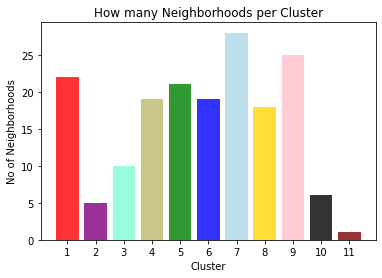

In [85]:
#Plot number of neighborhoods per cluster
objects = (1,2,3,4,5,6,7,8,9,10,11)
y_pos = np.arange(len(objects))
performance = nyc_venues_final2['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki','green','blue','lightblue','gold','pink','black','maroon'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [86]:
nyc_venues_final2['Cluster Labels'].value_counts()

6     28
8     25
0     22
4     21
5     19
3     19
7     18
2     10
9      6
1      5
10     1
Name: Cluster Labels, dtype: int64

In [87]:
averages_by_cluster = nyc_venues_final2.groupby('Cluster Labels').mean()
pop_den_plot = averages_by_cluster['Population Density sq/mile']
pop_den_plot

Cluster Labels
0      35421.818182
1     124338.800000
2      88836.900000
3       7918.421053
4      55093.333333
5      70056.000000
6      24654.000000
7      44732.777778
8      15199.920000
9     102839.166667
10    146955.000000
Name: Population Density sq/mile, dtype: float64

In [88]:
averages_by_cluster = nyc_venues_final2.groupby('Cluster Labels').mean()
death_plot = averages_by_cluster['Deaths']
death_plot

Cluster Labels
0     128.136364
1      87.800000
2     149.100000
3      65.736842
4     106.857143
5     119.210526
6     135.892857
7     141.277778
8      65.600000
9      57.833333
10     34.000000
Name: Deaths, dtype: float64

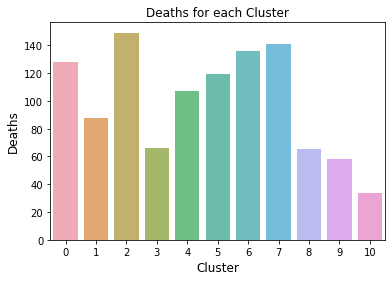

In [89]:
#plot number of deaths per cluster
sns.barplot(death_plot.index, death_plot.values, alpha=0.8)
plt.title('Deaths for each Cluster')
plt.ylabel('Deaths', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

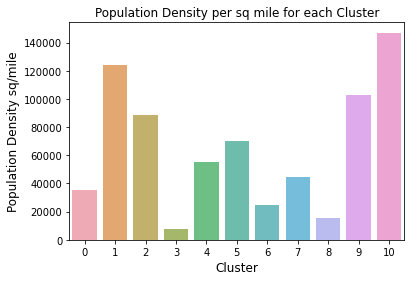

In [90]:
#plot population density per cluster
sns.barplot(pop_den_plot.index, pop_den_plot.values, alpha=0.8)
plt.title('Population Density per sq mile for each Cluster')
plt.ylabel('Population Density sq/mile', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

In [91]:
#find the neighborhoods where a bar is in the top 10 most common venues
count_of_bars = nyc_venues_final2.loc[(nyc_venues_final2['1st Most Common Venue'] == 'Bar') | (nyc_venues_final2['2nd Most Common Venue'] == 'Bar') | (nyc_venues_final2['3rd Most Common Venue'] == 'Bar') | (nyc_venues_final2['4th Most Common Venue'] == 'Bar') | (nyc_venues_final2['5th Most Common Venue'] == 'Bar') | (nyc_venues_final2['6th Most Common Venue'] == 'Bar') | (nyc_venues_final2['7th Most Common Venue'] == 'Bar') | (nyc_venues_final2['8th Most Common Venue'] == 'Bar') | (nyc_venues_final2['9th Most Common Venue'] == 'Bar') | (nyc_venues_final2['10th Most Common Venue'] == 'Bar')]
count_of_bars

Cluster Labels                                       Neighborhood  \
4                 9  Alphabet City/East Village/Stuyvesant Town-Coo...   
9                 7                                    Astoria (North)   
10                4                    Astoria (North)/Astoria (South)   
17                5                                  Battery Park City   
18                5                                  Battery Park City   
19                0                            Bay Ridge/Fort Hamilton   
21                8                    Bayside (North)/Bayside (South)   
23                4                 Bedford-Stuyvesant (East)/Bushwick   
25                7  Bedford-Stuyvesant (West)/Clinton Hill/Fort Gr...   
26                4     Bedford-Stuyvesant (West)/Crown Heights (West)   
36                4                             Boerum Hill/Park Slope   
38                3                                       Breezy Point   
43                4                         Bushwick/East Williamsburg   
46                6               Carroll Gardens/Cobble Hill/Red Hook   
59                2                          Chinatown/Lower East Side   
60                3                                        City Island   
62                7                      Clinton Hill/Prospect Heights   
66                7                                  Concourse/Melrose   
82                9            East Village/Gramercy/Greenwich Village   
83                0  East Williamsburg/Williamsburg (North)/William...   
87                5                                           Elmhurst   
89                0                                 Financial District   
90                9                                 Financial District   
91                5                 Flatbush/Prospect Lefferts Gardens   
92                5                         Flatiron/Gramercy/Kips Bay   
97                0                                       Forest Hills   
100               6                                 Glendale/Ridgewood   
101               0                 Gowanus/Park Slope/Windsor Terrace   
103               0                                Gravesend/Homecrest   
104               8                                        Great Kills   
108               2                       Hamilton Heights/West Harlem   
122               0                                        Kew Gardens   
125               2                         Kips Bay/Murray Hill/NoMad   
132               1  Manhattan Valley/Morningside Heights/Upper Wes...   
137               6          Morris Park/Pelham Bay/Westchester Square   
145               8          Port Richmond/Randall Manor/West Brighton   
154               5                                          Soundview   
158               5                                          Sunnyside   
159               6                                        Sunset Park   
160               4                                        Sunset Park   
163               1                          Upper East Side/Yorkville   
164              10                          Upper East Side/Yorkville   
165               5                                    Upper West Side   
167               1                         Washington Heights (North)   
172               0                                          Woodhaven   
173               0                                           Woodside   

         1st Most Common Venue 2nd Most Common Venue  \
4                          Bar          Cocktail Bar   
9                  Pizza Place         Deli / Bodega   
10                  Hookah Bar           Pizza Place   
17                        Park                 Hotel   
18                        Park                 Hotel   
19                         Spa           Pizza Place   
21                         Bar      Sushi Restaurant   
23                 Coffee Shop  Fast Food Restaurant   
25          Mexican Re

In [92]:
no_bar_plot = count_of_bars['Cluster Labels'].value_counts()

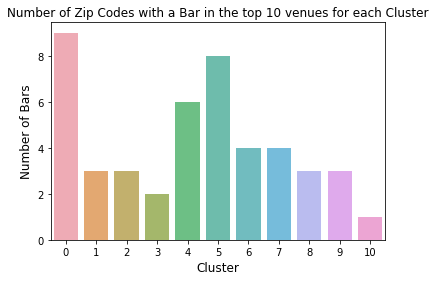

In [93]:
sns.barplot(no_bar_plot.index, no_bar_plot.values, alpha=0.8)
plt.title('Number of Zip Codes with a Bar in the top 10 venues for each Cluster')
plt.ylabel('Number of Bars', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

In [94]:
#find the neighborhoods where a gym is in the top 10 most common venues
count_of_gym = nyc_venues_final2.loc[(nyc_venues_final2['1st Most Common Venue'] == 'Gym') | (nyc_venues_final2['2nd Most Common Venue'] == 'Gym') | (nyc_venues_final2['3rd Most Common Venue'] == 'Gym') | (nyc_venues_final2['4th Most Common Venue'] == 'Gym') | (nyc_venues_final2['5th Most Common Venue'] == 'Gym') | (nyc_venues_final2['6th Most Common Venue'] == 'Gym') | (nyc_venues_final2['7th Most Common Venue'] == 'Gym') | (nyc_venues_final2['8th Most Common Venue'] == 'Gym') | (nyc_venues_final2['9th Most Common Venue'] == 'Gym') | (nyc_venues_final2['10th Most Common Venue'] == 'Gym')]
count_of_gym

Cluster Labels                                       Neighborhood  \
17                5                                  Battery Park City   
18                5                                  Battery Park City   
23                4                 Bedford-Stuyvesant (East)/Bushwick   
42                0           Brooklyn Heights/DUMBO/Downtown Brooklyn   
45                6                                           Canarsie   
49                5                 Central Harlem (North)/East Harlem   
61                2                               Claremont/Morrisania   
69                4                               Crown Heights (East)   
77                6                                        East Harlem   
78                2                                        East Harlem   
124               7   Kingsbridge/Marble Hill/Riverdale/Spuyten Duyvil   
125               2                         Kips Bay/Murray Hill/NoMad   
127               9                         Lenox Hill/Upper East Side   
129               1                                     Lincoln Square   
130               4                                     Lincoln Square   
138               4                                         Mott Haven   
139               0                             Mott Haven/Port Morris   
144               4  Parkchester/Pelham Parkway/Van Nest/Westcheste...   
151               7                                   Roosevelt Island   
162               7                                            TriBeCa   
163               1                          Upper East Side/Yorkville   
164              10                          Upper East Side/Yorkville   
170               8                                         Whitestone   
173               0                                           Woodside   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
17                   Park                 Hotel           Coffee Shop   
18                   Park                 Hotel           Coffee Shop   
23            Coffee Shop  Fast Food Restaurant           Pizza Place   
42                    Gym         Deli / Bodega           Pizza Place   
45                   Bank                   Gym    Chinese Restaurant   
49                    Gym                  Park                  Café   
61             Donut Shop                Bakery         Deli / Bodega   
69                   Bank    Chinese Restaurant         Deli / Bodega   
77     Mexican Restaurant              Pharmacy         Deli / Bodega   
78     Mexican Restaurant              Pharmacy         Deli / Bodega   
124           Pizza Place                   Gym    Spanish Restaurant   
125                 Hotel                   Bar           Coffee Shop   
127           Coffee Shop           Pizza Place          Burger Joint   
129  Gym / Fitness Center                  Park    Italian Restaurant   
130  Gym / Fitness Center                  Park    Italian Restaurant   
138           Pizza Place        Discount Store    Mexican Restaurant   
139                   Gym            Donut Shop    Spanish Restaurant   
144                   Gym           Bus Station            Restaurant   
151                  Park                 Plaza           Dry Cleaner   
162           Coffee Shop  Gym / Fitness Center                 Hotel   
163    Italian Restaurant           Coffee Shop           Pizza Place   
164    Italian Restaurant           Coffee Shop           Pizza Place   
170                   Gym     Mobile Phone Shop                  Bank   
173         Grocery Store                   Bar           Pizza Place   

         4th Most Common Venue      5th Most Common Venue  \
17                  Playground         Italian Restaurant   
18                  Playground         Italian Restaurant   
23          Spanish Restaurant              Smoothie Shop   
42                        Park              Grocery Store   
45            Video Gam

In [95]:
no_gym_plot = count_of_gym['Cluster Labels'].value_counts()

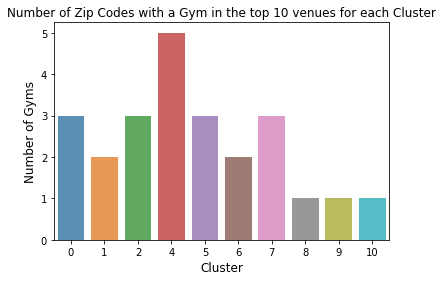

In [96]:
sns.barplot(no_gym_plot.index, no_gym_plot.values, alpha=0.8)
plt.title('Number of Zip Codes with a Gym in the top 10 venues for each Cluster')
plt.ylabel('Number of Gyms', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

In [97]:
#find the neighborhoods where a nightlclub is in the top 10 most common venues
count_of_nightclubs = nyc_venues_final2.loc[(nyc_venues_final2['1st Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['2nd Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['3rd Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['4th Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['5th Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['6th Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['7th Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['8th Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['9th Most Common Venue'] == 'Nightclub') | (nyc_venues_final2['10th Most Common Venue'] == 'Nightclub')]
count_of_nightclubs

Cluster Labels                          Neighborhood  \
31                5  Belmont/Claremont/Mount Hope/Tremont   
44                8                       Cambria Heights   
62                7         Clinton Hill/Prospect Heights   
116               3                           Hunts Point   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
31             Donut Shop  Fast Food Restaurant             Nightclub   
44   Caribbean Restaurant        Cosmetics Shop                Bakery   
62                    Bar    Mexican Restaurant                  Café   
116    Chinese Restaurant           Supermarket  Gym / Fitness Center   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
31                   Bank                  Park           Pizza Place   
44              Nightclub  Gym / Fitness Center          Liquor Store   
62              Wine Shop          Cocktail Bar           Coffee Shop   
116            Restaurant             BBQ Joint             Juice Bar   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
31            Gas Station           Bus Station                Lounge   
44            Flower Shop           Bus Station              Pharmacy   
62               Wine Bar       Thai Restaurant            Playground   
116    Mexican Restaurant           Coffee Shop        Waste Facility   

    10th Most Common Venue  Yoga Studio  Accessories Store  Acupuncturist  \
31           Grocery Store          0.0                0.0            0.0   
44     Filipino Restaurant          0.0                0.0            0.0   
62               Nightclub          0.0                0.0            0.0   
116              Nightclub          0.0                0.0            0.0   

     Adult Boutique  Afghan Restaurant  African Restaurant  Airport Tram  \
31              0.0                0.0                 0.0           0.0   
44              0.0                0.0                 0.0           0.0   
62              0.0                0.0                 0.0           0.0   
116             0.0                0.0                 0.0           0.0   

     American Restaurant  Animal Shelter  Antique Shop  Arcade  \
31              0.000000             0.0           0.0     0.0   
44              0.000000             0.0           0.0     0.0   
62              0.029851             0.0           0.0     0.0   
116             0.000000             0.0           0.0     0.0   

     Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
31                0.0                     0.0     0.000000         0.0   
44                0.0                     0.0     0.000000         0.0   
62                0.0                     0.0     0.014925         0.0   
116               0.0                     0.0     0.000000         0.0   

     Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
31                   0.0               0.0                 0.0         0.0   
44                   0.0               0.0                 0.0         0.0   
62                   0.0               0.0                 0.0         0.0   
116                  0.0               0.0                 0.0         0.0   

     Australian Restaurant  Austrian Restaurant  Automotive Shop  BBQ Joint  \
31                     0.0                  0.0              0.0   0.000000   
44                     0.0                  0.0              0.0   0.000000   
62                     0.0                  0.0              0.0   0.000000   
116                    0.0                  0.0              0.0   0.083333   

     Baby Store  Bagel Shop  Baggage Locker    Bakery      Bank       Bar  \
31          0.0         0.0             0.0  0.000000  0.052632  0.000000   
44          0.0         0.0             0.0  0.083333  0.000000  0.000000   
62          0.0         0.0             0.0  0.014925  0.000000  0.134328   
116         0.0         0.0          

In [98]:
no_club_plot = count_of_nightclubs['Cluster Labels'].value_counts()

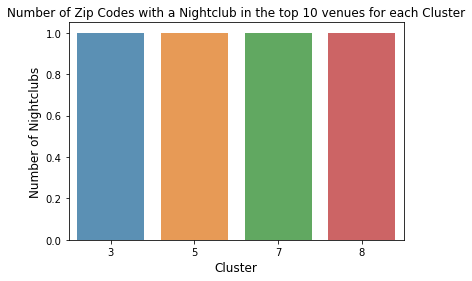

In [99]:
sns.barplot(no_club_plot.index, no_club_plot.values, alpha=0.8)
plt.title('Number of Zip Codes with a Nightclub in the top 10 venues for each Cluster')
plt.ylabel('Number of Nightclubs', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

In [100]:
#find the neighborhoods where a gym is in the top 10 most common venues
count_of_salon = nyc_venues_final2.loc[(nyc_venues_final2['1st Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['2nd Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['3rd Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['4th Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['5th Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['6th Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['7th Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['8th Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['9th Most Common Venue'] == 'Salon / Barbershop') | (nyc_venues_final2['10th Most Common Venue'] == 'Salon / Barbershop')]
count_of_salon

Cluster Labels                                       Neighborhood  \
4                 9  Alphabet City/East Village/Stuyvesant Town-Coo...   
56                2                                            Chelsea   
79                5                                       East Midtown   
145               8          Port Richmond/Randall Manor/West Brighton   
146               6                                     Queens Village   
147               6                                     Queens Village   
148               7                                          Rego Park   
156               6                                   South Ozone Park   

           1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
4                            Bar          Cocktail Bar           Coffee Shop   
56                   Coffee Shop   American Restaurant           Yoga Studio   
79            Italian Restaurant           Coffee Shop                Bakery   
145                         Café    Salon / Barbershop       Piercing Parlor   
146               Discount Store                  Bank         Deli / Bodega   
147               Discount Store                  Bank         Deli / Bodega   
148  Eastern European Restaurant         Grocery Store           Supermarket   
156           Seafood Restaurant        Breakfast Spot  Caribbean Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
4      Mexican Restaurant              Wine Bar           Pizza Place   
56   Gym / Fitness Center    Seafood Restaurant                Bakery   
79      French Restaurant                 Hotel   American Restaurant   
145                   Bar                  Bank        Sandwich Place   
146  Caribbean Restaurant                  Park  Fast Food Restaurant   
147  Caribbean Restaurant                  Park  Fast Food Restaurant   
148              Pharmacy        Farmers Market        Discount Store   
156              Pharmacy    Salon / Barbershop           Pizza Place   

      7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
4        Italian Restaurant                Garden    Salon / Barbershop   
56       Italian Restaurant         Grocery Store          Cocktail Bar   
79   Furniture / Home Store    Salon / Barbershop                   Spa   
145              Bagel Shop        Hardware Store  Fast Food Restaurant   
146          Sandwich Place    Salon / Barbershop            Donut Shop   
147          Sandwich Place    Salon / Barbershop            Donut Shop   
148                   Diner            Restaurant    Miscellaneous Shop   
156             Coffee Shop  Fast Food Restaurant                 Field   

    10th Most Common Venue  Yoga Studio  Accessories Store  Acupuncturist  \
4             Dessert Shop         0.00                0.0            0.0   
56      Salon / Barbershop         0.04                0.0            0.0   
79                Wine Bar         0.01                0.0            0.0   
145             Donut Shop         0.00                0.0            0.0   
146    Fried Chicken Joint         0.00                0.0            0.0   
147    Fried Chicken Joint         0.00                0.0            0.0   
148     Salon / Barbershop         0.00                0.0            0.0   
156                Exhibit         0.00                0.0            0.0   

     Adult Boutique  Afghan Restaurant  African Restaurant  Airport Tram  \
4              0.00                0.0                 0.0           0.0   
56             0.00                0.0                 0.0           0.0   
79             0.01                0.0                 0.0           0.0   
145            0.00                0.0                 0.0           0.0   
146            0.00                0.0                 0.0           0.0   
147            0.00                0.0                 0.0           0.0   
148            0.00                0.0                 0.

In [101]:
no_salon_plot = count_of_salon['Cluster Labels'].value_counts()

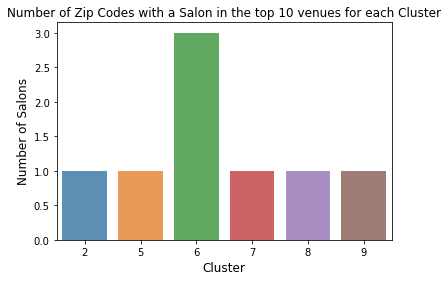

In [102]:
sns.barplot(no_salon_plot.index, no_salon_plot.values, alpha=0.8)
plt.title('Number of Zip Codes with a Salon in the top 10 venues for each Cluster')
plt.ylabel('Number of Salons', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.show()

In [112]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_venues_final2['Latitude'], nyc_venues_final2['Longitude'], nyc_venues_final2['Neighborhood'], nyc_venues_final2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_New_York)
       
map_New_York